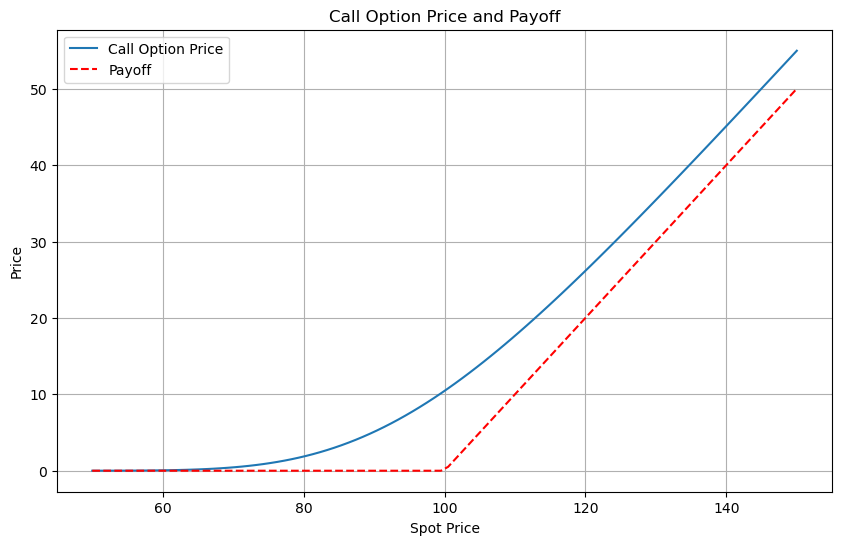

In [1]:
import sys
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Black-Scholes formula for call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example parameters
S = np.linspace(50, 150, 100)  # Spot price
K = 100  # Strike price
T = 1  # Time to maturity in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate call prices
call_prices = black_scholes_call(S, K, T, r, sigma)

# Calculate payoff
payoff = np.maximum(S - K, 0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices, label='Call Option Price')
plt.plot(S, payoff, 'r--', label='Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Price')
plt.title('Call Option Price and Payoff')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Black-Scholes formula for call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for put option price
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Function to update the plot
def update_plot(S=100, K=100, T=1, r=0.05, sigma=0.2):
    # Create a range of spot prices around the slider value
    S_range = np.linspace(50, 150, 100)  # Define a range of spot prices
    call_prices = black_scholes_call(S_range, K, T, r, sigma)
    put_prices = black_scholes_put(S_range, K, T, r, sigma)
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, call_prices, label='Call Prices')
    plt.plot(S_range, put_prices, label='Put Prices')
    plt.axvline(S, color='gray', linestyle='--', label=f'Current Spot: {S}')
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Black-Scholes Option Pricing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
S_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Spot Price:')
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price:')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity:')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Risk-Free Rate:')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatility:')

# Create an interactive widget
interactive_plot = widgets.interactive(
    update_plot, S=S_slider, K=K_slider, T=T_slider, r=r_slider, sigma=sigma_slider
)
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='Spot Price:', max=150.0, min=50.0, step=1.0), Floa…